# Exploration of Chest X-ray Datasets

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Datasets

This NIH Chest X-ray8 Dataset is comprised of 112,120 X-ray images with disease labels from 30,805 unique patients. To create these labels, the authors used Natural Language Processing to text-mine disease classifications from the associated radiological reports. The labels are expected to be >90% accurate and suitable for weakly-supervised learning [[ Ref 1.]](https://arxiv.org/abs/1705.02315)

[ For simplified Exploration on Iteration 1. (Subset of this Dataset was used)]

- images-small : Folder containing 1000 X-ray Images.
- `train-small.csv` : Metadata of the those 1000 Images.

In [22]:
# Reading Metadata for x-ray Dataset (Subset)
train_df = pd.read_csv('train-small.csv')

print('\nShape Train-Set DataFrame :', train_df.shape)
print('')
train_df.head()


Shape Train-Set DataFrame : (1000, 16)



,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


Description Diagnosis Columns : As Shown in the DataFrame the columns for each x-ray images( in row ) described with (1) and (0) representing whether the patient were diagnosed with the disease or not respectively in that column.

**Note:** *One patient may have been positive(1) in multiple columns*

### Null Check and DataTypes

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

### Unique Patient ID

For overlaping patients with multiple records, the datasets need to be explored for data leckage ( patient appearing in both training and test sets)

In [24]:
print('Total Patient IDs :', train_df['PatientId'].count())
print('Unique Patient IDs :', train_df['PatientId'].value_counts().shape[0])

Total Patient IDs : 1000
Unique Patient IDs : 928


### Labels

In [25]:
columns = list(train_df.keys())
columns.remove('Image')
columns.remove('PatientId')
print(columns)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


### Class Frequencies

Text(0, 0.5, 'Diseases')

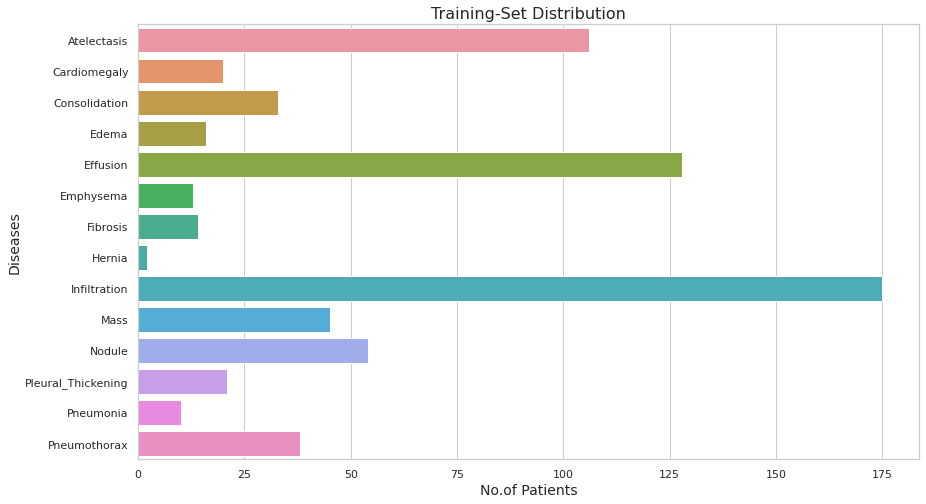

In [26]:
class_counts = train_df.sum().drop(['Image', 'PatientId'])
# for column in class_counts.keys():
#  print(f'{column} => {train_df[column].sum()} Samples.')

# Plot distribution
sns.set(rc={'figure.figsize':(14,8)})
sns.set_theme(style="whitegrid")
sns.barplot(x=class_counts.values, y=class_counts.index)
plt.title('Training-Set Distribution', fontsize=16)
plt.xlabel('No.of Patients', fontsize=14)
plt.ylabel('Diseases', fontsize=14)

### Samples

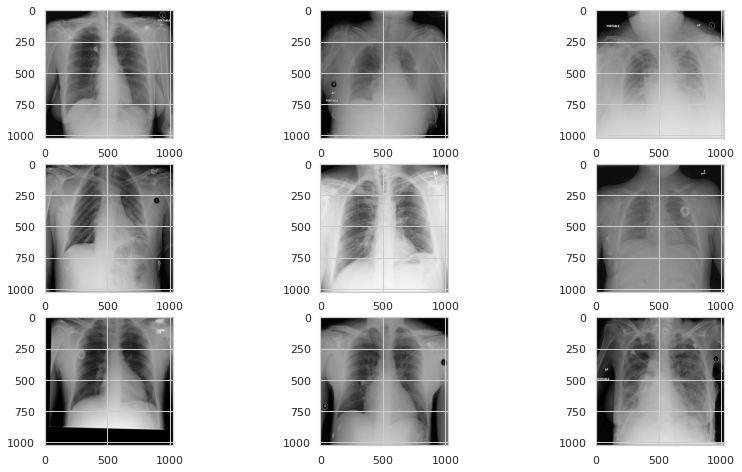

In [33]:
# Dataframe : numpy values from Image column
images = train_df['Image'].values
rand_img = [np.random.choice(images) for i in range(9)]
img_dir = 'images-small/'

# Plot 9 random images
for i in range(9):
    plt.subplot(3,3, i+1)
    img = plt.imread(os.path.join(img_dir, rand_img[i]))
    plt.imshow(img, cmap='gray')

### Pixel value distribution (Single Sample)

Img. Dimension:  (1024, 1024)
Max, Min Pixel values (0.9607843, 0.0)
Mean, SD of Pixel values (0.5039146, 0.25131243)


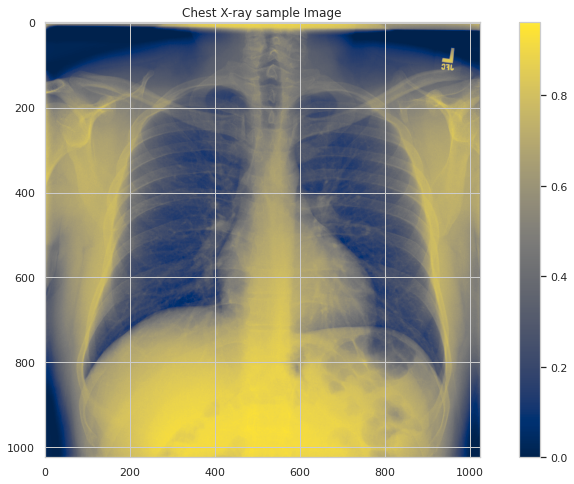

In [54]:
sample_img = plt.imread(os.path.join(img_dir, train_df.Image[33]))

plt.title('Chest X-ray sample Image')
plt.imshow(sample_img, cmap='cividis')
plt.colorbar()

print('Img. Dimension: ', sample_img.shape)
print('Max, Min Pixel values',( sample_img.max(), sample_img.min()))
print('Mean, SD of Pixel values', (sample_img.mean(), sample_img.std()))

Text(0, 0.5, 'no. of pixels in image')

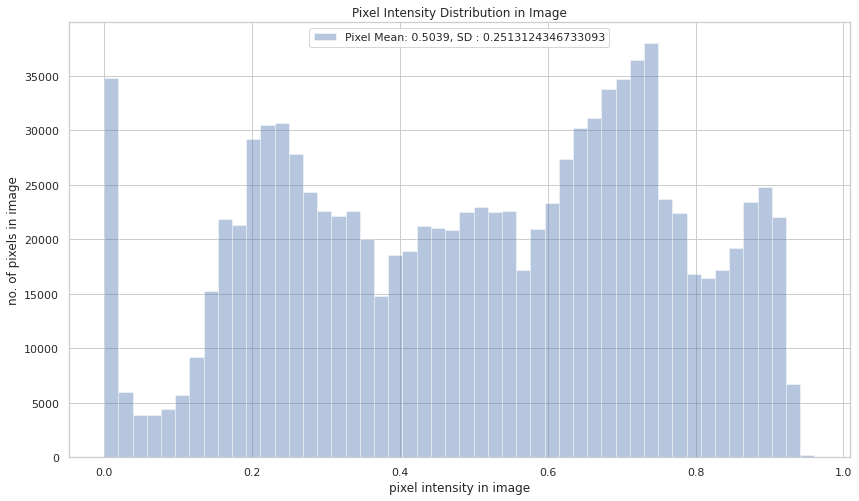

In [55]:
# Histogram of Pixel distribution
sns.distplot(
    sample_img.ravel()
    , label = f'Pixel Mean: {np.mean(sample_img):.4f}, SD : {np.std(sample_img)}'
    , kde=False )

plt.legend(loc='upper center')
plt.title('Pixel Intensity Distribution in Image')
plt.xlabel('pixel intensity in image')
plt.ylabel('no. of pixels in image')

## References

- [[Reference 1.] Hospital-scale Chest X-ray Database and Benchmarks onWeakly-Supervised Classification and Localization of Common Thorax Diseases](https://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf)